In [121]:
import pandas as pd

In [122]:
animals = pd.read_csv('project1.csv')

In [123]:
animals.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [124]:
# now we need to check for duplicate rows

animals.duplicated().sum()

17

In [125]:
animals = animals.drop_duplicates()

In [126]:
animals.duplicated().sum()

0

In [127]:
# I immediately notice that Month year is a duplicate of DateTime and that Animal ID is not needed to determine Outcome

animals.drop(['MonthYear'], axis=1, inplace=True)
animals.drop(['Animal ID'], axis=1, inplace=True)

In [128]:
animals.shape

(131148, 10)

In [129]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131148 entries, 0 to 131164
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date of Birth     131148 non-null  object
 1   Name              93645 non-null   object
 2   DateTime          131148 non-null  object
 3   Outcome Type      131108 non-null  object
 4   Outcome Subtype   65802 non-null   object
 5   Animal Type       131148 non-null  object
 6   Sex upon Outcome  131148 non-null  object
 7   Age upon Outcome  131148 non-null  object
 8   Breed             131148 non-null  object
 9   Color             131148 non-null  object
dtypes: object(10)
memory usage: 11.0+ MB


In [130]:
# Every animal has a valid ID, DOB, DateTime, MonthYear, Outcome Type, Animal Type, Sex upon Outcome, Age upon Outcome, Breed, and Color
# Name and Outcome Subtype has null entries

# Additionally all object data types - probably strings
# DOB, DateTime, Age Upon Outcome need to be turned into an integers
# Animal Type, Sex upon Outcome, Breed, Color, Outcome Type, Outcome Subtype maybe need to be one hot encoded
# Maybe name should be converted into do they have a name or not? I will investigate

In [131]:
animals.dtypes

Date of Birth       object
Name                object
DateTime            object
Outcome Type        object
Outcome Subtype     object
Animal Type         object
Sex upon Outcome    object
Age upon Outcome    object
Breed               object
Color               object
dtype: object

In [132]:
# Here I'll convert DOB to a datetime
# [1]

animals['Date of Birth'] = pd.to_datetime(animals['Date of Birth'], format='%m/%d/%y')

In [133]:
animals['Date of Birth'].head()

0   2014-05-25
1   2014-05-25
2   2014-05-25
3   2014-05-25
4   2014-05-25
Name: Date of Birth, dtype: datetime64[ns]

In [134]:
animals['Date of Birth'].describe()

count                           131148
mean     2017-06-08 01:55:47.680482816
min                1991-09-22 00:00:00
25%                2014-08-23 00:00:00
50%                2017-05-25 00:00:00
75%                2020-08-09 00:00:00
max                2025-04-28 00:00:00
Name: Date of Birth, dtype: object

In [135]:
# Here I'll convert DateTime to a datetime
# I suspect that time of check in is much less important than date of check in because I see no animals who are immideately adopted or transfered
# I'll drop time of check in and keep date

animals['DateTime'] = animals['DateTime'].str.extract(r'(\d\d\d\d-\d\d-\d\d)')[0]

In [136]:
animals['DateTime'].head()

0    2014-06-10
1    2014-06-10
2    2014-06-10
3    2014-06-10
4    2014-06-10
Name: DateTime, dtype: object

In [137]:
animals['DateTime'] = pd.to_datetime(animals['DateTime'], format='%Y-%m-%d')

In [138]:
animals['DateTime'].head()

0   2014-06-10
1   2014-06-10
2   2014-06-10
3   2014-06-10
4   2014-06-10
Name: DateTime, dtype: datetime64[ns]

In [139]:
# Here I'll convert age upon outcome to integer

animals['x'] = animals['Age upon Outcome'].str.extract(r'(\d)')[0].astype(int)

In [140]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,x
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2


In [141]:
animals['units'] = animals['Age upon Outcome'].str.extract(r'([A-Za-z]+)').astype(str)

In [142]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,x,units
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,weeks
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,weeks
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,weeks
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,weeks
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,weeks


In [143]:
import numpy as np

# [2]
animals['units'] = animals['units'].apply(lambda x: 1 if x=='days' else 7 if x=='weeks' else 31 if x=='months' else 365 if x=='years' else np.nan)

In [144]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,x,units
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0


In [145]:
animals['Days Alive'] = animals['x'] * animals['units']

In [146]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,x,units,Days Alive
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0,14.0
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0,14.0
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0,14.0
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0,14.0
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,2,7.0,14.0


In [147]:
animals.drop(['Age upon Outcome', 'x', 'units'], axis=1, inplace=True)

In [148]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Breed,Color,Days Alive
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,14.0
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,14.0
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,14.0
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,14.0
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Bird,Unknown,Duck,Yellow/Black,14.0


In [149]:
# now I'm going to start working on one hot encoding the categorical variables

animals['Animal Type'].unique()

array(['Bird', 'Dog', 'Cat', 'Livestock'], dtype=object)

In [150]:
animals = pd.get_dummies(animals, columns=['Animal Type'], drop_first=True)

In [151]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Sex upon Outcome,Breed,Color,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,False,False
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,False,False
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,False,False
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,False,False
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,False,False


In [152]:
animals['Color'].unique()

array(['Yellow/Black', 'Brown/Black', 'Brown', 'Black/White', 'Black',
       'White', 'Brown/White', 'Tan', 'Blue Tabby', 'Cream', 'Gold',
       'Red', 'Fawn/White', 'White/Gray', 'Torbie', 'Sable', 'Yellow',
       'White/Black', 'White/Chocolate', 'Cream/Black', 'White/Brown',
       'Chocolate/White', 'White/Red Tick', 'White/Brown Brindle',
       'Buff/Gray', 'Black/Tan', 'Blue Merle/Black', 'Chocolate',
       'White/Tan', 'Tan/White', 'Pink', 'Tricolor', 'Red/White',
       'Calico', 'Brown Tabby/White', 'Brown Brindle', 'Blue Tick/Black',
       'Blue/White', 'Black/Brown', 'Green/Blue', 'Brown Tabby',
       'Orange Tabby', 'Tortie', 'Blue Merle', 'Orange/Tan',
       'White/White', 'Orange Tabby/White', 'Cream Tabby',
       'Cream Tabby/White', 'Lilac Point', 'Lynx Point', 'Black/Buff',
       'White/Cream Tabby', 'Seal Point', 'Blue Merle/White',
       'Brown Brindle/White', 'Sable/Buff', 'Chocolate/Tan',
       'Brown/Brown', 'Tortie Point', 'Orange/Orange Tabby',
     

In [153]:
# this is not very useful to me because I have lots of different combinations of different colors
# I'd rather have single colors - instead of "Yellow/Black", I want "Yellow" and "Black"

colors = animals['Color'].str.split(r'[/]')

In [154]:
colors

0         [Yellow, Black]
1         [Yellow, Black]
2         [Yellow, Black]
3         [Yellow, Black]
4         [Yellow, Black]
               ...       
131160      [Brown Tabby]
131161       [Red, White]
131162      [Brown Tabby]
131163     [White, Brown]
131164             [Buff]
Name: Color, Length: 131148, dtype: object

In [155]:
# [3]
unique_colors = set(color for row in colors for color in row)

In [156]:
for color in unique_colors:
    animals['color_' + color] = animals['Color'].apply(lambda x: True if color in x else False)

In [157]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Sex upon Outcome,Breed,Color,Days Alive,Animal Type_Cat,...,color_Torbie,color_Liver Tick,color_Agouti,color_Brown Tiger,color_Black Tiger,color_Liver,color_Tricolor,color_Tan,color_Cream,color_Red Tick
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Unknown,Duck,Yellow/Black,14.0,False,...,False,False,False,False,False,False,False,False,False,False


In [158]:
# this is probably more dimensions than I want to feed into my model, but maybe when I start to plot my data I will learn that
# certain colors are better predictors of outcome than others - for example maybe there are a few rare colors that adopters
# really like

In [159]:
animals.drop(['Color'], axis=1, inplace=True)

In [160]:
# now I'll one hot encode sex upon outcome

animals['Sex upon Outcome'].unique()

array(['Unknown', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Neutered Male'], dtype=object)

In [161]:
animals = pd.get_dummies(animals, columns=['Sex upon Outcome'], drop_first=True)

In [162]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Breed,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,...,color_Black Tiger,color_Liver,color_Tricolor,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [163]:
# now I'll investigate the name column

animals['Name'].unique()

array([nan, 'Jenny Tyson', '*Stetson', ..., '*Gorgeous George', '*Hen',
       'Nahtha'], dtype=object)

In [164]:
# since there are so many unique names I suspect that it will be hard to learn a pattern of adoptable names without use of an LLM
# to make it easier for an LR model, I will encode names as whether the animal has a name or not
# maybe this is a better indicator of whether the animal will get adopted than what the animals name is
# Note: whether an animals has a name or not could be covariate with the age of the animal - maybe younger animals haven't been named yet
# I will want to investigate this

animals['Has Name'] = animals['Name'].apply(lambda x: False if pd.isna(x) else True)

In [165]:
animals.head()

,Date of Birth,Name,DateTime,Outcome Type,Outcome Subtype,Breed,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,...,color_Liver,color_Tricolor,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name
0,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014-05-25,NaN,2014-06-10,Transfer,Partner,Duck,14.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [166]:
animals.drop(['Name'], axis=1, inplace=True)

In [167]:
# Here I'm noting that the objective is to predict outcome type not outcome subtype
# this makes outcome subtype irrelevant and so I will drop it
# I'm also going to drop the breed column as recommended in the project description

animals.drop(['Outcome Subtype', 'Breed'], axis=1, inplace=True)

In [168]:
animals.head()

,Date of Birth,DateTime,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Ruddy,color_Gray Tabby,...,color_Liver,color_Tricolor,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name
0,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


<Axes: xlabel='Days Alive', ylabel='Count'>

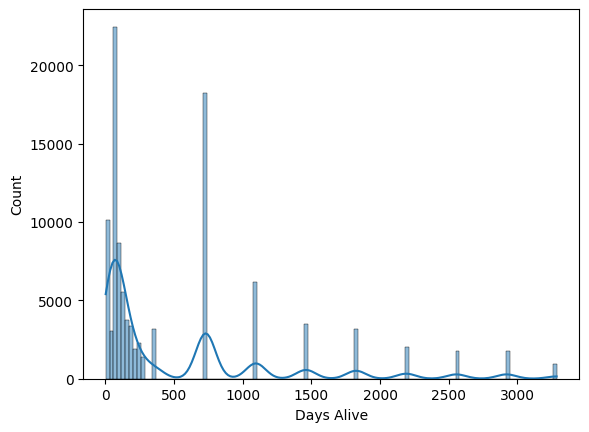

In [169]:
# now I'm going to explore some of the feature relationships
# first I'll explore the relationship between days alive and the target
# I'll note that I expect there to be a strong correlation here - people love puppies

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=animals['Days Alive'], kde=True)

In [170]:
animals['Days Alive'].unique()

array([1.400e+01, 6.200e+01, 2.800e+01, 1.550e+02, 1.860e+02,       nan,
       2.480e+02, 2.100e+01, 2.190e+03, 7.000e+00, 1.095e+03, 7.300e+02,
       1.240e+02, 3.100e+01, 1.825e+03, 2.920e+03, 9.300e+01, 3.285e+03,
       2.555e+03, 1.460e+03, 4.000e+00, 2.170e+02, 3.650e+02, 2.790e+02,
       3.000e+00, 2.000e+00, 3.500e+01, 5.000e+00, 6.000e+00])

In [171]:
# we can make some groups here:
# lets make a group for <=1 month, 1 month-6 months, 6 months-2 years, and 2+ years
# [4]

edges = [0, 31, 186, 730, np.inf]
animals["Days Alive Bin"] = pd.cut(animals["Days Alive"], bins=edges, right=True)

counts = pd.crosstab(animals["Days Alive Bin"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

Counts per bin:
 Outcome Type    Adoption  Transfer
Days Alive Bin                    
(0.0, 31.0]         2178     10852
(31.0, 186.0]      36086      7810
(186.0, 730.0]     17034      9945
(730.0, inf]       12444      6850

Ratios per bin:
 Outcome Type    Adoption  Transfer
Days Alive Bin                    
(0.0, 31.0]     0.167153  0.832847
(31.0, 186.0]   0.822079  0.177921
(186.0, 730.0]  0.631380  0.368620
(730.0, inf]    0.644967  0.355033


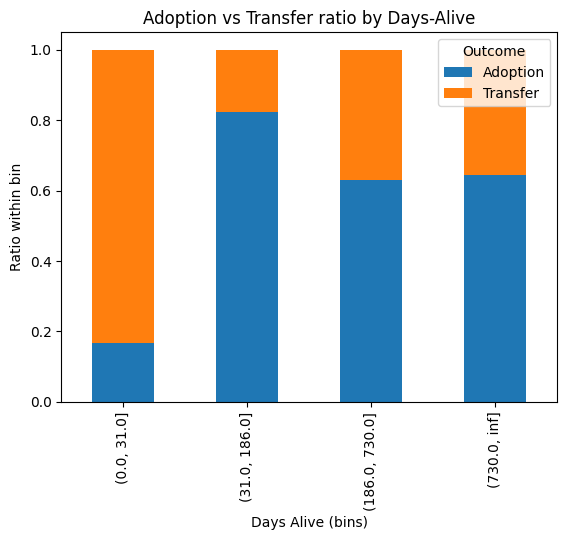

In [172]:
ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Days-Alive")
ax.set_xlabel("Days Alive (bins)")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [173]:
# here we see that there is a clear relationship between days alive and outcome
# we should keep this feature

In [174]:
# now lets examine the DateTime relationship
# I'll note that I expect this feature to have real trends that might generalize to a test set but won't generalize to future data
# for example maybe there was a period spanning a few months where all of the shelters in the area were at maximum capacity and had to transfer
# many animals
# or maybe there was a period of recession spanning a few years where less people adopted pets because the financial burden was too heavy
# note that there is no feature which describes the current available capacity of the shelters or the economic state of the region and our model cant
# guess at these things just by looking at a future date
# for the sake of me not knowing the downstream task of this model, I will ignore these concerns and keep this column so long as I find a trend

# first I want to know the range of DateTime values so that I can play with bin sizes
animals['DateTime'].describe()

count                           131148
mean     2019-02-08 16:59:57.035410432
min                2013-10-01 00:00:00
25%                2016-04-25 00:00:00
50%                2018-11-04 00:00:00
75%                2021-11-24 00:00:00
max                2025-05-05 00:00:00
Name: DateTime, dtype: object

Counts per bin:
 Outcome Type                                        Adoption  Transfer
DateTime Bin                                                          
(2013-09-30 23:59:59.999999999, 2016-08-24 12:0...     21404     16250
(2016-08-24 12:00:00, 2019-07-19 00:00:00]             23455     14065
(2019-07-19 00:00:00, 2022-06-11 12:00:00]             18673      9523
(2022-06-11 12:00:00, 2025-05-05 00:00:00]             20048      7690

Ratios per bin:
 Outcome Type                                        Adoption  Transfer
DateTime Bin                                                          
(2013-09-30 23:59:59.999999999, 2016-08-24 12:0...  0.568439  0.431561
(2016-08-24 12:00:00, 2019-07-19 00:00:00]          0.625133  0.374867
(2019-07-19 00:00:00, 2022-06-11 12:00:00]          0.662257  0.337743
(2022-06-11 12:00:00, 2025-05-05 00:00:00]          0.722763  0.277237


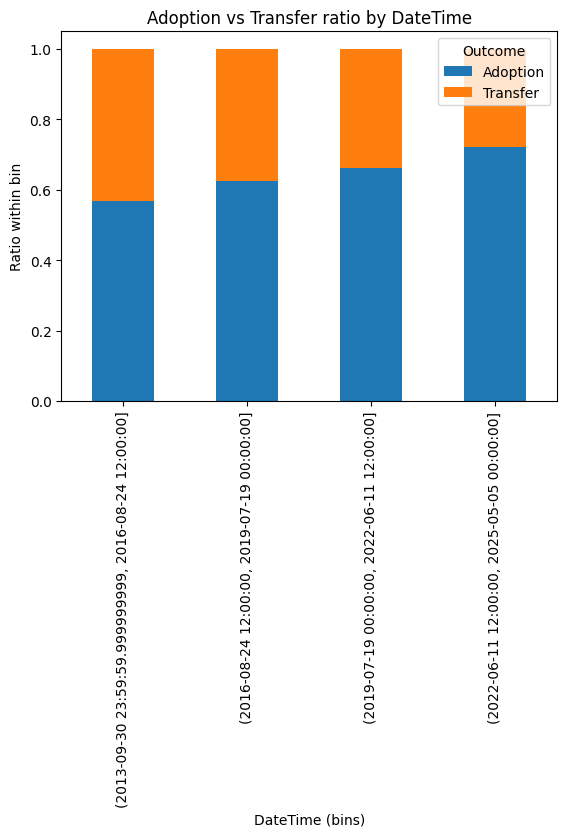

In [175]:
# we'll start with 4 bins, each covering a roughly 3 year period

edges = pd.date_range(animals["DateTime"].min(), animals["DateTime"].max(), periods=5)
animals["DateTime Bin"] = pd.cut(animals["DateTime"], bins=edges, include_lowest=True)

counts = pd.crosstab(animals["DateTime Bin"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by DateTime")
ax.set_xlabel("DateTime (bins)")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

Counts per bin:
 Outcome Type                                        Adoption  Transfer
DateTime Bin                                                          
(2013-09-30 23:59:59.999999999, 2013-12-28 05:0...      1779      1340
(2013-12-28 05:00:00, 2014-03-26 10:00:00]              1403      1015
(2014-03-26 10:00:00, 2014-06-22 15:00:00]              1510      1633
(2014-06-22 15:00:00, 2014-09-18 20:00:00]              2291      1792
(2014-09-18 20:00:00, 2014-12-16 01:00:00]              1638      1478
(2014-12-16 01:00:00, 2015-03-14 06:00:00]              1576       841
(2015-03-14 06:00:00, 2015-06-10 11:00:00]              1484      1528
(2015-06-10 11:00:00, 2015-09-06 16:00:00]              2242      1809
(2015-09-06 16:00:00, 2015-12-03 21:00:00]              1771      1459
(2015-12-03 21:00:00, 2016-03-01 02:00:00]              1771       882
(2016-03-01 02:00:00, 2016-05-28 07:00:00]              1509      1277
(2016-05-28 07:00:00, 2016-08-24 12:00:00]              2430

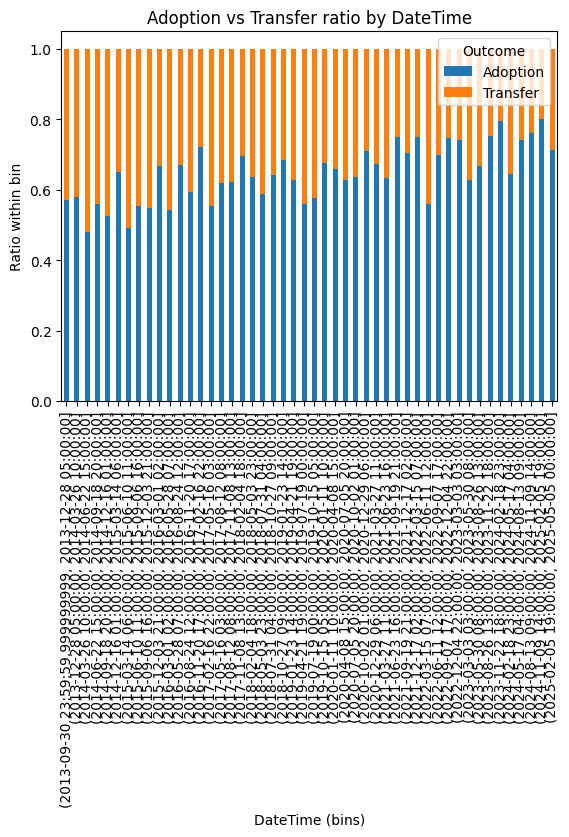

In [176]:
# it looks like the adoption rate is rising!
# now lets try bins which each represent roughly one year

edges = pd.date_range(animals["DateTime"].min(), animals["DateTime"].max(), periods=49)
animals["DateTime Bin"] = pd.cut(animals["DateTime"], bins=edges, include_lowest=True)

counts = pd.crosstab(animals["DateTime Bin"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by DateTime")
ax.set_xlabel("DateTime (bins)")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [57]:
# I think this is enough to justify keeping the DateTime feature

In [58]:
# I do want to clean up the time part of this feature though
# I doubt that any shelter systematically decides to transfer an animal just based on the time of day that they showed up
# I also suspect that these timestamps are inconsistently reported - many shelter workers probably don't report as soon as an animal shows up
# The model can probably only overfit to these timestamps

animals['Date of Check In'] = animals['DateTime'].dt.date

In [59]:
animals.head()

,Date of Birth,DateTime,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Ruddy,color_Gray Tabby,...,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Days Alive Bin,DateTime Bin,Date of Check In
0,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10
1,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10
2,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10
3,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10
4,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10


In [60]:
# I also need to convert DateTime into a ML ready format - I'm going to make it days since minimum DateTime
# the earliest DateTime was Oct 1 of 2013
from datetime import date

start = pd.Timestamp(date(2013, 10, 1))
animals['Date of Check In'] = pd.to_datetime(animals['Date of Check In'], errors='coerce')
animals['Day of Check In'] = (animals['Date of Check In'] - start).dt.days
animals.head()

,Date of Birth,DateTime,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Ruddy,color_Gray Tabby,...,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Days Alive Bin,DateTime Bin,Date of Check In,Day of Check In
0,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10,252
1,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10,252
2,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10,252
3,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10,252
4,2014-05-25,2014-06-10,Transfer,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,"(0.0, 31.0]","(2013-09-30 23:59:59.999999999, 2014-09-18 20:...",2014-06-10,252


In [61]:
animals.drop(['DateTime', 'DateTime Bin', 'Days Alive Bin', 'Date of Check In'], axis=1, inplace=True)

In [62]:
# Date of birth is just the subtraction of DateTime with Days Alive
# That makes it a duplicate column, so it should be dropped

animals.drop(['Date of Birth'], axis=1, inplace=True)

Counts per bin:
 Outcome Type  Adoption  Transfer
Type                            
Cat              35774     26698
Dog              47466     20560
Livestock           17         8
Bird               323       262

Ratios per bin:
 Outcome Type  Adoption  Transfer
Type                            
Cat           0.572641  0.427359
Dog           0.697763  0.302237
Livestock     0.680000  0.320000
Bird          0.552137  0.447863


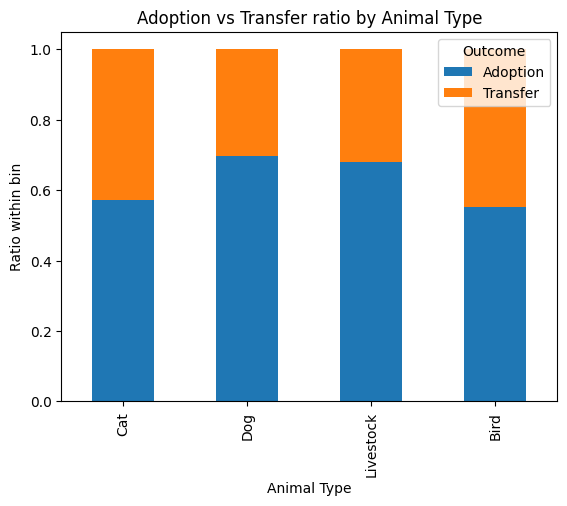

In [63]:
# now lets look at animal type
# [5]

animals["Type"] = np.select([animals["Animal Type_Cat"], animals["Animal Type_Dog"], animals["Animal Type_Livestock"]], ["Cat", "Dog", "Livestock"], default="Bird")

counts = pd.crosstab(animals["Type"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0).reindex(index=["Cat","Dog","Livestock","Bird"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Animal Type")
ax.set_xlabel("Animal Type")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [64]:
# looks like there's a trent here

In [65]:
# now lets do animal color

color_cols = [c for c in animals.columns if c.startswith('color_')]

In [66]:
color_cols

['color_Blue Tabby',
 'color_Ruddy',
 'color_Gray Tabby',
 'color_Cream Tiger',
 'color_Orange',
 'color_Blue Tiger',
 'color_Calico Point',
 'color_Lynx Point',
 'color_Tortie Point',
 'color_Black Brindle',
 'color_Tortie',
 'color_Blue Merle',
 'color_Calico',
 'color_Gray',
 'color_Silver Lynx Point',
 'color_Yellow Brindle',
 'color_Blue',
 'color_Fawn',
 'color_Seal Point',
 'color_Brown Merle',
 'color_Black Tabby',
 'color_Blue Cream',
 'color_Blue Smoke',
 'color_Chocolate Point',
 'color_Gold',
 'color_Brown',
 'color_Red',
 'color_Black Smoke',
 'color_Gray Tiger',
 'color_Cream Tabby',
 'color_Sable',
 'color_Brown Tabby',
 'color_Black',
 'color_White',
 'color_Buff',
 'color_Silver Tabby',
 'color_Orange Tiger',
 'color_Apricot',
 'color_Red Merle',
 'color_Lilac Point',
 'color_Green',
 'color_Flame Point',
 'color_Pink',
 'color_Yellow',
 'color_Chocolate',
 'color_Blue Point',
 'color_Blue Tick',
 'color_Silver',
 'color_Brown Brindle',
 'color_Orange Tabby',
 'color_T

Counts per bin:
 Outcome Type           Adoption  Transfer
Color                                    
color_Agouti                 16         6
color_Apricot                42        30
color_Black               21806     12123
color_Black Brindle         350       129
color_Black Smoke           198        96
color_Black Tabby           161       217
color_Blue                 5025      2706
color_Blue Merle            423       155
color_Blue Tabby           2406      1524
color_Blue Tiger             31         9
color_Brown               21889     12099
color_Brown Merle           234        76
color_Buff                  336       191
color_Calico               1803      1201
color_Calico Point           44        32
color_Chocolate             450       243
color_Chocolate Point        62        40
color_Cream                 460       329
color_Cream Tabby          1105       687
color_Cream Tiger             1         0
color_Fawn                  619       276
color_Flame Point

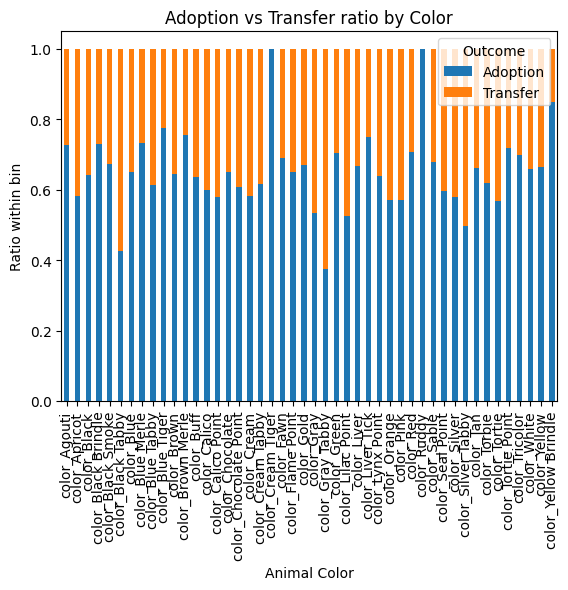

In [67]:
# [6]

conds = [animals[c] for c in color_cols]
choices = [c for c in color_cols]

animals["Color"] = np.select(conds, choices, default="None")

counts = pd.crosstab(animals["Color"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Color")
ax.set_xlabel("Animal Color")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [68]:
# some of these trends definitely seem valuable
# some of them seem very ungeneralizable - for example animals with the color Liver or Ruddy have a 100% adoption rate because there is only 1 sample
# of each
# lets drop any color bin with less than 100 samples in it - I'm arbitrarily choosing 100 because it seems like a good enough sample size to draw a
# generalizable trend from

for column in animals[color_cols]:
    if animals[column].sum() < 100:
        animals.drop([column], axis=1, inplace=True)

In [69]:
animals.columns

Index(['Outcome Type', 'Days Alive', 'Animal Type_Cat', 'Animal Type_Dog',
       'Animal Type_Livestock', 'color_Blue Tabby', 'color_Gray Tabby',
       'color_Orange', 'color_Lynx Point', 'color_Tortie Point',
       'color_Black Brindle', 'color_Tortie', 'color_Blue Merle',
       'color_Calico', 'color_Gray', 'color_Blue', 'color_Fawn',
       'color_Seal Point', 'color_Brown Merle', 'color_Black Tabby',
       'color_Blue Cream', 'color_Chocolate Point', 'color_Gold',
       'color_Brown', 'color_Red', 'color_Black Smoke', 'color_Cream Tabby',
       'color_Sable', 'color_Brown Tabby', 'color_Black', 'color_White',
       'color_Buff', 'color_Silver Tabby', 'color_Red Merle',
       'color_Lilac Point', 'color_Flame Point', 'color_Yellow',
       'color_Chocolate', 'color_Blue Point', 'color_Blue Tick',
       'color_Silver', 'color_Brown Brindle', 'color_Orange Tabby',
       'color_Torbie', 'color_Tricolor', 'color_Tan', 'color_Cream',
       'color_Red Tick', 'Sex upon Outcome_

Counts per bin:
 Type                     Dog    Cat  Livestock  Bird
Color                                               
None                      80     24          5    11
color_Black            19032  14801         10   104
color_Black Brindle      476      2          0     1
color_Black Smoke         20    275          0     0
color_Black Tabby          0    378          0     0
color_Blue              3174   4556          0    47
color_Blue Merle         578      0          0     0
color_Blue Tabby           0   3930          0     0
color_Brown            18245  15656          2    94
color_Brown Merle        308      2          0     0
color_Buff               507     20          0     0
color_Calico               2   3077          0     0
color_Chocolate          670     23          0     0
color_Chocolate Point      0    102          0     0
color_Cream              695     93          1     4
color_Cream Tabby          0   1793          0     0
color_Fawn               893 

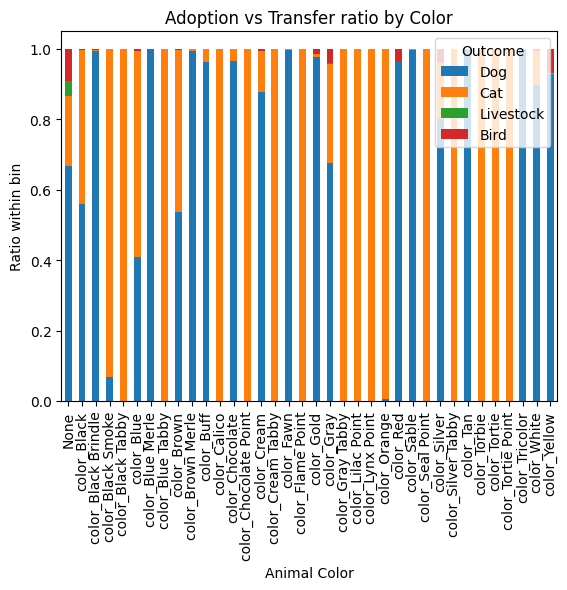

In [70]:
# I want to compare the adoption rate by color to the adoption rate by animal type - this will tell me if the animal color tells me anything
# that animal type doesn't already tell me
# lets compare this to the adoption rates of different colors

cat_adoption_rate = 0.572641
dog_adoption_rate = 0.697763
livestock_adoption_rate = 0.680000
bird_adoption_rate = 0.552137

color_cols = [c for c in animals.columns if c.startswith('color_')]

conds = [animals[c] for c in color_cols]
choices = [c for c in color_cols]

animals["Color"] = np.select(conds, choices, default="None")

counts = pd.crosstab(animals["Color"], animals["Type"]).reindex(columns=["Dog","Cat", "Livestock", "Bird"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Color")
ax.set_xlabel("Animal Color")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [71]:
color_type_aggregate_adoption_rate = ratios.iloc[:, 0] * dog_adoption_rate + ratios.iloc[:, 1] * cat_adoption_rate + ratios.iloc[:, 2] * livestock_adoption_rate + ratios.iloc[:, 3] * bird_adoption_rate

In [72]:
color_type_aggregate_adoption_rate

Color
None                     0.658649
color_Black              0.642758
color_Black Brindle      0.696937
color_Black Smoke        0.581124
color_Black Tabby        0.572641
color_Blue               0.623583
color_Blue Merle         0.697763
color_Blue Tabby         0.572641
color_Brown              0.639739
color_Brown Merle        0.696956
color_Buff               0.693015
color_Calico             0.572722
color_Chocolate          0.693610
color_Chocolate Point    0.572641
color_Cream              0.682332
color_Cream Tabby        0.572641
color_Fawn               0.697321
color_Flame Point        0.572641
color_Gold               0.694523
color_Gray               0.656770
color_Gray Tabby         0.572641
color_Lilac Point        0.572641
color_Lynx Point         0.572641
color_Orange             0.573223
color_Red                0.692653
color_Sable              0.697338
color_Seal Point         0.572641
color_Silver             0.672174
color_Silver Tabby       0.572641
color_Ta

Counts per bin:
 Outcome Type           Adoption  Transfer
Color                                    
None                         75        45
color_Black               21809     12123
color_Black Brindle         350       129
color_Black Smoke           198        96
color_Black Tabby           161       217
color_Blue                 5058      2715
color_Blue Merle            423       155
color_Blue Tabby           2406      1524
color_Brown               21890     12099
color_Brown Merle           234        76
color_Buff                  336       191
color_Calico               1847      1232
color_Chocolate             450       243
color_Chocolate Point        62        40
color_Cream                 462       331
color_Cream Tabby          1105       687
color_Fawn                  619       276
color_Flame Point           262       141
color_Gold                  172        85
color_Gray                  915       796
color_Gray Tabby            257       429
color_Lilac Point

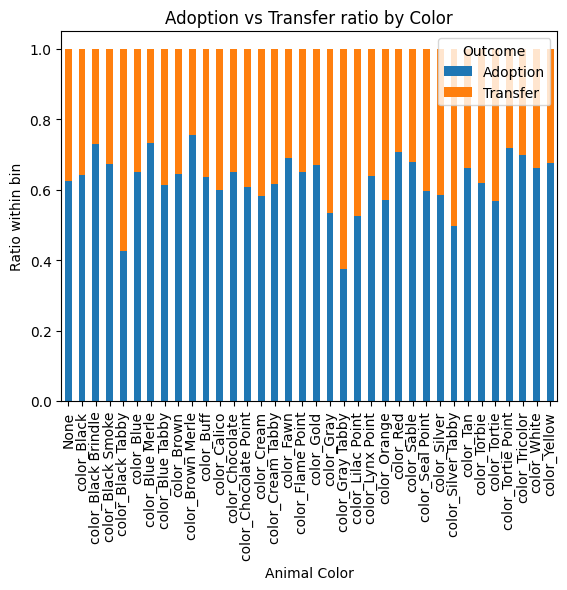

In [73]:
# now we want to compare these adoption rates to adoption rates by color

counts = pd.crosstab(animals["Color"], animals["Outcome Type"]).reindex(columns=["Adoption", "Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Color")
ax.set_xlabel("Animal Color")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [74]:
color_vs_aggregate_difference = ratios.iloc[:, 0] - color_type_aggregate_adoption_rate

In [75]:
color_vs_aggregate_difference

Color
None                    -0.033649
color_Black             -0.000031
color_Black Brindle      0.033752
color_Black Smoke        0.092346
color_Black Tabby       -0.146715
color_Blue               0.027131
color_Blue Merle         0.034071
color_Blue Tabby         0.039573
color_Brown              0.004293
color_Brown Merle        0.057883
color_Buff              -0.055443
color_Calico             0.027148
color_Chocolate         -0.044260
color_Chocolate Point    0.035202
color_Cream             -0.099734
color_Cream Tabby        0.043988
color_Fawn              -0.005701
color_Flame Point        0.077483
color_Gold              -0.025262
color_Gray              -0.121995
color_Gray Tabby        -0.198005
color_Lilac Point       -0.048545
color_Lynx Point         0.065701
color_Orange            -0.001133
color_Red                0.014300
color_Sable             -0.017081
color_Seal Point         0.025097
color_Silver            -0.088016
color_Silver Tabby      -0.076345
color_Ta

In [76]:
# I notice that some colors such as Gray Tabby differ from the expected adoption rate by as much as 19% while others such as black differ by 0.05% from
# the expectation - colors like this offer no real additional value to the dataset
# I'm going to try eliminating color columns which don't differ by more than 2% from the expectation
# My assumption here is that any difference less than 2% could just be the result of noise
# I can always come back to this later and change my threshold

uninformative_colors = (abs(color_vs_aggregate_difference) - 0.02) < 0
uninformative_colors

Color
None                     False
color_Black               True
color_Black Brindle      False
color_Black Smoke        False
color_Black Tabby        False
color_Blue               False
color_Blue Merle         False
color_Blue Tabby         False
color_Brown               True
color_Brown Merle        False
color_Buff               False
color_Calico             False
color_Chocolate          False
color_Chocolate Point    False
color_Cream              False
color_Cream Tabby        False
color_Fawn                True
color_Flame Point        False
color_Gold               False
color_Gray               False
color_Gray Tabby         False
color_Lilac Point        False
color_Lynx Point         False
color_Orange              True
color_Red                 True
color_Sable               True
color_Seal Point         False
color_Silver             False
color_Silver Tabby       False
color_Tan                False
color_Torbie             False
color_Tortie              True
co

In [77]:
for column in uninformative_colors.index:
    print(column)
    if uninformative_colors[column] == True:
        animals.drop([column], axis=1, inplace=True)

None
color_Black
color_Black Brindle
color_Black Smoke
color_Black Tabby
color_Blue
color_Blue Merle
color_Blue Tabby
color_Brown
color_Brown Merle
color_Buff
color_Calico
color_Chocolate
color_Chocolate Point
color_Cream
color_Cream Tabby
color_Fawn
color_Flame Point
color_Gold
color_Gray
color_Gray Tabby
color_Lilac Point
color_Lynx Point
color_Orange
color_Red
color_Sable
color_Seal Point
color_Silver
color_Silver Tabby
color_Tan
color_Torbie
color_Tortie
color_Tortie Point
color_Tricolor
color_White
color_Yellow


In [78]:
animals.columns

Index(['Outcome Type', 'Days Alive', 'Animal Type_Cat', 'Animal Type_Dog',
       'Animal Type_Livestock', 'color_Blue Tabby', 'color_Gray Tabby',
       'color_Lynx Point', 'color_Tortie Point', 'color_Black Brindle',
       'color_Blue Merle', 'color_Calico', 'color_Gray', 'color_Blue',
       'color_Seal Point', 'color_Brown Merle', 'color_Black Tabby',
       'color_Blue Cream', 'color_Chocolate Point', 'color_Gold',
       'color_Black Smoke', 'color_Cream Tabby', 'color_Brown Tabby',
       'color_White', 'color_Buff', 'color_Silver Tabby', 'color_Red Merle',
       'color_Lilac Point', 'color_Flame Point', 'color_Chocolate',
       'color_Blue Point', 'color_Blue Tick', 'color_Silver',
       'color_Brown Brindle', 'color_Orange Tabby', 'color_Torbie',
       'color_Tan', 'color_Cream', 'color_Red Tick',
       'Sex upon Outcome_Intact Male', 'Sex upon Outcome_Neutered Male',
       'Sex upon Outcome_Spayed Female', 'Sex upon Outcome_Unknown',
       'Has Name', 'Day of Check In

Counts per bin:
 Outcome Type   Adoption  Transfer
Sex                              
Intact Male        1396     13028
Neutered Male     40665      8357
Spayed Female     39727      6895
Unknown             185      4910
Intact Female      1607     14338

Ratios per bin:
 Outcome Type   Adoption  Transfer
Sex                              
Intact Male    0.096783  0.903217
Neutered Male  0.829526  0.170474
Spayed Female  0.852108  0.147892
Unknown        0.036310  0.963690
Intact Female  0.100784  0.899216


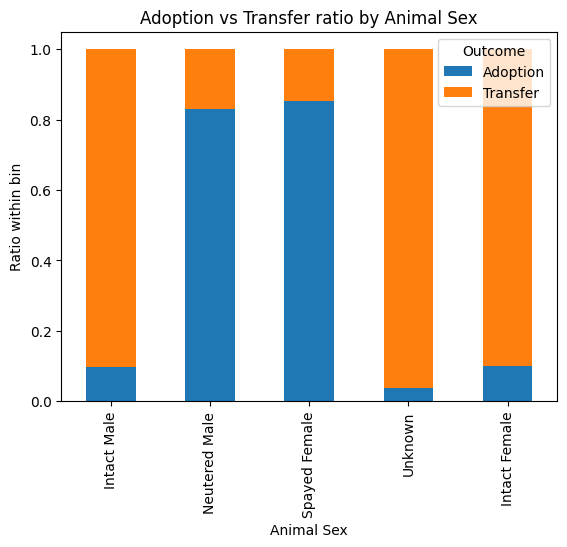

In [79]:
# now lets inspect the sex upon outcome relationship with Outcome type

animals["Sex"] = np.select([animals["Sex upon Outcome_Intact Male"], animals["Sex upon Outcome_Neutered Male"], animals["Sex upon Outcome_Spayed Female"], animals["Sex upon Outcome_Unknown"]], ["Intact Male", "Neutered Male", "Spayed Female", "Unknown"], default="Intact Female")

counts = pd.crosstab(animals["Sex"], animals["Outcome Type"]).reindex(columns=["Adoption","Transfer"], fill_value=0).reindex(index=["Intact Male", "Neutered Male", "Spayed Female", "Unknown", "Intact Female"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Adoption vs Transfer ratio by Animal Sex")
ax.set_xlabel("Animal Sex")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [80]:
# didn't expect this strong of a trend... very interesting

In [81]:
animals.head()

,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Gray Tabby,color_Lynx Point,color_Tortie Point,color_Black Brindle,...,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Day of Check In,Type,Color,Sex
0,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,252,Bird,color_Black,Unknown
1,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,252,Bird,color_Black,Unknown
2,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,252,Bird,color_Black,Unknown
3,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,252,Bird,color_Black,Unknown
4,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,252,Bird,color_Black,Unknown


Counts per bin:
 Days Alive Bin  (0.0, 31.0]  (31.0, 186.0]  (186.0, 730.0]  (730.0, inf]
Has Name                                                                
False                  8546          13058            5111          2154
True                   4488          30845           21880         17147

Ratios per bin:
 Days Alive Bin  (0.0, 31.0]  (31.0, 186.0]  (186.0, 730.0]  (730.0, inf]
Has Name                                                                
False              0.296027       0.452319        0.177041      0.074613
True               0.060355       0.414806        0.294244      0.230594


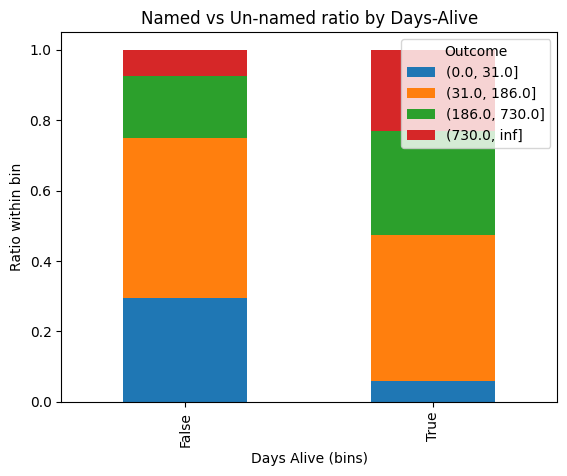

In [82]:
# Finally lets inspect the relationship between having a name and getting adopted
# I mentioned earlier that there might be a relationship between having a name and animal age - I'll investigate this first
# the calculation here will be similar the the one involving color and type above
# the adoption rates by age use here are from the calculation above

less_than_1m = 0.167153
less_than_6m = 0.822079
less_than_2y = 0.631380
more_than_2y = 0.644967

edges = [0, 31, 186, 730, np.inf]
animals["Days Alive Bin"] = pd.cut(animals["Days Alive"], bins=edges, right=True)

counts = pd.crosstab(animals["Has Name"], animals["Days Alive Bin"]).reindex(fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Named vs Un-named ratio by Days-Alive")
ax.set_xlabel("Days Alive (bins)")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [83]:
age_based_adoption_rate_name_weighted = ratios.iloc[:, 0] * less_than_1m + ratios.iloc[:, 1] * less_than_6m + ratios.iloc[:, 2] * less_than_2y + ratios.iloc[:, 3] * more_than_2y
age_based_adoption_rate_name_weighted

Has Name
False    0.581227
True     0.685598
dtype: float64

Counts per bin:
 Outcome Type  Adoption  Transfer
Has Name                        
False            13310     24182
True             70270     23346

Ratios per bin:
 Outcome Type  Adoption  Transfer
Has Name                        
False         0.355009  0.644991
True          0.750620  0.249380


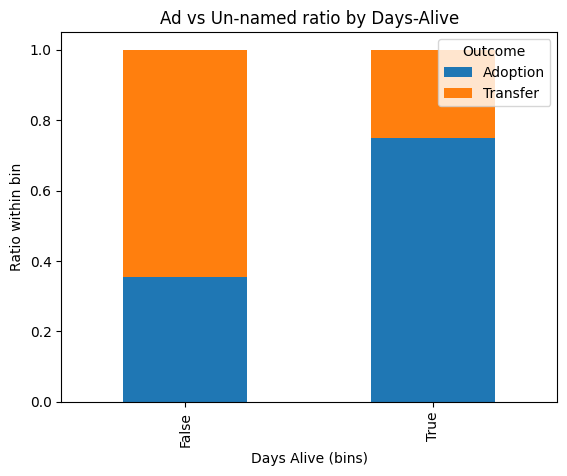

In [84]:
# Now we compare to the adoption rates just by name

counts = pd.crosstab(animals["Has Name"], animals["Outcome Type"]).reindex(columns=["Adoption", "Transfer"], fill_value=0)
ratios = counts.div(counts.sum(axis=1), axis=0)

print("Counts per bin:\n", counts)
print("\nRatios per bin:\n", ratios)

ax = ratios.plot(kind="bar", stacked=True)
ax.set_title("Ad vs Un-named ratio by Days-Alive")
ax.set_xlabel("Days Alive (bins)")
ax.set_ylabel("Ratio within bin")
ax.legend(title="Outcome", loc="upper right")

In [85]:
difference = age_based_adoption_rate_name_weighted - ratios.iloc[:, 0]

In [86]:
difference

Has Name
False    0.226218
True    -0.065022
dtype: float64

In [87]:
# these seem significant enough to keep the name data

In [88]:
# now lets clean up any columns that we created during this data exploration phase that we don't want to plug into the model
# In retrospect I should have done the data exploration before cleaning up my dataset (one-hot encoding, etc) - oh well lesson learned

animals.columns

Index(['Outcome Type', 'Days Alive', 'Animal Type_Cat', 'Animal Type_Dog',
       'Animal Type_Livestock', 'color_Blue Tabby', 'color_Gray Tabby',
       'color_Lynx Point', 'color_Tortie Point', 'color_Black Brindle',
       'color_Blue Merle', 'color_Calico', 'color_Gray', 'color_Blue',
       'color_Seal Point', 'color_Brown Merle', 'color_Black Tabby',
       'color_Blue Cream', 'color_Chocolate Point', 'color_Gold',
       'color_Black Smoke', 'color_Cream Tabby', 'color_Brown Tabby',
       'color_White', 'color_Buff', 'color_Silver Tabby', 'color_Red Merle',
       'color_Lilac Point', 'color_Flame Point', 'color_Chocolate',
       'color_Blue Point', 'color_Blue Tick', 'color_Silver',
       'color_Brown Brindle', 'color_Orange Tabby', 'color_Torbie',
       'color_Tan', 'color_Cream', 'color_Red Tick',
       'Sex upon Outcome_Intact Male', 'Sex upon Outcome_Neutered Male',
       'Sex upon Outcome_Spayed Female', 'Sex upon Outcome_Unknown',
       'Has Name', 'Day of Check In

In [89]:
animals.head()

,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Gray Tabby,color_Lynx Point,color_Tortie Point,color_Black Brindle,...,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Day of Check In,Type,Color,Sex,Days Alive Bin
0,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,252,Bird,color_Black,Unknown,"(0.0, 31.0]"
1,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,252,Bird,color_Black,Unknown,"(0.0, 31.0]"
2,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,252,Bird,color_Black,Unknown,"(0.0, 31.0]"
3,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,252,Bird,color_Black,Unknown,"(0.0, 31.0]"
4,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,True,False,252,Bird,color_Black,Unknown,"(0.0, 31.0]"


In [90]:
animals.drop(['Type', 'Color', 'Days Alive Bin'], axis=1, inplace=True)

In [91]:
animals.head()

,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Gray Tabby,color_Lynx Point,color_Tortie Point,color_Black Brindle,...,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Day of Check In,Sex
0,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
1,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
2,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
3,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
4,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown


In [92]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131148 entries, 0 to 131164
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Outcome Type                    131108 non-null  object 
 1   Days Alive                      103229 non-null  float64
 2   Animal Type_Cat                 131148 non-null  bool   
 3   Animal Type_Dog                 131148 non-null  bool   
 4   Animal Type_Livestock           131148 non-null  bool   
 5   color_Blue Tabby                131148 non-null  bool   
 6   color_Gray Tabby                131148 non-null  bool   
 7   color_Lynx Point                131148 non-null  bool   
 8   color_Tortie Point              131148 non-null  bool   
 9   color_Black Brindle             131148 non-null  bool   
 10  color_Blue Merle                131148 non-null  bool   
 11  color_Calico                    131148 non-null  bool   
 12  color_Gray           

In [93]:
# looks like there are some null values

animals.isnull().sum()

Outcome Type                         40
Days Alive                        27919
Animal Type_Cat                       0
Animal Type_Dog                       0
Animal Type_Livestock                 0
color_Blue Tabby                      0
color_Gray Tabby                      0
color_Lynx Point                      0
color_Tortie Point                    0
color_Black Brindle                   0
color_Blue Merle                      0
color_Calico                          0
color_Gray                            0
color_Blue                            0
color_Seal Point                      0
color_Brown Merle                     0
color_Black Tabby                     0
color_Blue Cream                      0
color_Chocolate Point                 0
color_Gold                            0
color_Black Smoke                     0
color_Cream Tabby                     0
color_Brown Tabby                     0
color_White                           0
color_Buff                            0


In [94]:
# first lets fill missing age values
# we found a strong correlation between age and having a name so lets use average age across named groups to fill missing values

animals['Days Alive'] = animals.groupby(['Has Name'])['Days Alive'].transform(lambda x: x.fillna(x.mean()))

In [95]:
# earlier we found that age and sex were the strongest indicators of outcome
# so lets use the the mode outcome of similar age and sex to fill missing outcome values

animals['Outcome Type'] = animals.groupby(['Sex', 'Days Alive'])['Outcome Type'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else ''))

In [96]:
animals.isnull().sum()

Outcome Type                      0
Days Alive                        0
Animal Type_Cat                   0
Animal Type_Dog                   0
Animal Type_Livestock             0
color_Blue Tabby                  0
color_Gray Tabby                  0
color_Lynx Point                  0
color_Tortie Point                0
color_Black Brindle               0
color_Blue Merle                  0
color_Calico                      0
color_Gray                        0
color_Blue                        0
color_Seal Point                  0
color_Brown Merle                 0
color_Black Tabby                 0
color_Blue Cream                  0
color_Chocolate Point             0
color_Gold                        0
color_Black Smoke                 0
color_Cream Tabby                 0
color_Brown Tabby                 0
color_White                       0
color_Buff                        0
color_Silver Tabby                0
color_Red Merle                   0
color_Lilac Point           

In [97]:
animals.head()

,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Gray Tabby,color_Lynx Point,color_Tortie Point,color_Black Brindle,...,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Day of Check In,Sex
0,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
1,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
2,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
3,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown
4,Transfer,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,252,Unknown


In [98]:
animals.drop(['Sex'], axis=1, inplace=True)

In [99]:
###### PART 2 #######

In [100]:
# we need to convert outcome type to binary classes before we plug into a model

animals['Outcome Type'] = animals['Outcome Type'].apply(lambda x: 1 if x == 'Adoption' else 0)
animals.head()

,Outcome Type,Days Alive,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,color_Blue Tabby,color_Gray Tabby,color_Lynx Point,color_Tortie Point,color_Black Brindle,...,color_Torbie,color_Tan,color_Cream,color_Red Tick,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,Has Name,Day of Check In
0,0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,252
1,0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,252
2,0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,252
3,0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,252
4,0,14.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,252


In [101]:
# prepare the test and train sets

X = animals.drop(['Outcome Type'], axis=1)
y = animals['Outcome Type']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=6)

In [102]:
# lets do regular KNN classification first
# we'll just use k=3 on this model - we can tune this up more when we use KNN w GSCV

from sklearn.neighbors import KNeighborsClassifier

k3nn = KNeighborsClassifier(n_neighbors=3)

k3nn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
# now lets see how it does with precision, recall, and f1

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_test=accuracy_score(y_test, k3nn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, k3nn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, k3nn.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, k3nn.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, k3nn.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, k3nn.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, k3nn.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, k3nn.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.76
Accuracy of knn on train data is : 0.88
Recall of knn on test data is : 0.85
Recall of knn on train data is : 0.93
Precision of knn on test data is : 0.8
Precision of knn on train data is : 0.88
F1 of knn on test data is : 0.82
F1 of knn on train data is : 0.91


In [104]:
# This did surprisingly well - I expected KNN to do pretty poorly
# lets see how good we can get using KNN with GridSearchCV

knn_search_accuracy = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 100)}

from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [105]:
# let's evaluate using all of the metrics... even though we're going to use gridsearchCV again optimizing for recall, precision, and f1

knn_best_accuracy = knn_gscv.best_estimator_

accuracy_test=accuracy_score(y_test, knn_best_accuracy.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn_best_accuracy.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn_best_accuracy.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn_best_accuracy.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn_best_accuracy.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn_best_accuracy.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn_best_accuracy.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn_best_accuracy.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.77
Accuracy of knn on train data is : 0.99
Recall of knn on test data is : 0.83
Recall of knn on train data is : 0.99
Precision of knn on test data is : 0.82
Precision of knn on train data is : 1.0
F1 of knn on test data is : 0.82
F1 of knn on train data is : 1.0


In [106]:
# now we'll optimize for recall

knn_search_recall = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv_r = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring='recall')

knn_gscv_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [107]:
knn_best_recall = knn_gscv_r.best_estimator_

accuracy_test=accuracy_score(y_test, knn_best_recall.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn_best_recall.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn_best_recall.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn_best_recall.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn_best_recall.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn_best_recall.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn_best_recall.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn_best_recall.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.73
Accuracy of knn on train data is : 0.74
Recall of knn on test data is : 0.92
Recall of knn on train data is : 0.92
Precision of knn on test data is : 0.73
Precision of knn on train data is : 0.73
F1 of knn on test data is : 0.81
F1 of knn on train data is : 0.82


In [108]:
# now we'll use precision

knn_search_precision = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv_p = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring='precision')

knn_gscv_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='precision')

In [109]:
knn_best_precision = knn_gscv_p.best_estimator_

accuracy_test=accuracy_score(y_test, knn_best_precision.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn_best_precision.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn_best_precision.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn_best_precision.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn_best_precision.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn_best_precision.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn_best_precision.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn_best_precision.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.72
Accuracy of knn on train data is : 0.89
Recall of knn on test data is : 0.68
Recall of knn on train data is : 0.82
Precision of knn on test data is : 0.85
Precision of knn on train data is : 1.0
F1 of knn on test data is : 0.76
F1 of knn on train data is : 0.9


In [110]:
# now we'll use f1

knn_search_f1 = KNeighborsClassifier()

param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv_f1 = GridSearchCV(knn_search_f1, param_grid, cv=5, scoring='f1')

knn_gscv_f1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1')

In [111]:
knn_best_f1 = knn_gscv_f1.best_estimator_

accuracy_test=accuracy_score(y_test, knn_best_f1.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn_best_f1.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn_best_f1.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn_best_f1.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn_best_f1.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn_best_f1.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn_best_f1.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn_best_f1.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.73
Accuracy of knn on train data is : 0.74
Recall of knn on test data is : 0.92
Recall of knn on train data is : 0.92
Precision of knn on test data is : 0.73
Precision of knn on train data is : 0.74
F1 of knn on test data is : 0.81
F1 of knn on train data is : 0.82


In [112]:
# finally lets see how we can do using linear classification

from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='perceptron', alpha=0.05, random_state=6)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.05, loss='perceptron', random_state=6)

In [113]:
# and lets evaluate

accuracy_test=accuracy_score(y_test, clf.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, clf.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, clf.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, clf.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, clf.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, clf.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, clf.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, clf.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.5
Accuracy of knn on train data is : 0.5
Recall of knn on test data is : 0.23
Recall of knn on train data is : 0.23
Precision of knn on test data is : 0.95
Precision of knn on train data is : 0.95
F1 of knn on test data is : 0.37
F1 of knn on train data is : 0.37


In [114]:
knn_best_accuracy

KNeighborsClassifier(n_neighbors=1)

In [115]:
knn_best_precision

KNeighborsClassifier(n_neighbors=2)

In [116]:
knn_best_recall

KNeighborsClassifier(n_neighbors=99)

In [117]:
knn_best_f1

KNeighborsClassifier(n_neighbors=85)

In [118]:
# now we'll optimize for recall again using a different seach

knn_search_recall_2 = KNeighborsClassifier()

param_grid = {"n_neighbors": [100, 120, 140, 160, 180, 200]}

knn_gscv_r = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring='recall')

knn_gscv_r.fit(X_train, y_train)

knn_best_recall_2 = knn_gscv_r.best_estimator_

accuracy_test=accuracy_score(y_test, knn_best_recall_2.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn_best_recall_2.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

recall_test=recall_score(y_test, knn_best_recall_2.predict(X_test))
print('Recall of knn on test data is : {:.2}'.format(recall_test))

recall_train=recall_score(y_train, knn_best_recall_2.predict(X_train))
print('Recall of knn on train data is : {:.2}'.format(recall_train))

precision_test=precision_score(y_test, knn_best_recall_2.predict(X_test))
print('Precision of knn on test data is : {:.2}'.format(precision_test))

precision_train=precision_score(y_train, knn_best_recall_2.predict(X_train))
print('Precision of knn on train data is : {:.2}'.format(precision_train))

f1_test=f1_score(y_test, knn_best_recall_2.predict(X_test))
print('F1 of knn on test data is : {:.2}'.format(f1_test))

f1_train=f1_score(y_train, knn_best_recall_2.predict(X_train))
print('F1 of knn on train data is : {:.2}'.format(f1_train))

Accuracy of knn on test data is : 0.72
Accuracy of knn on train data is : 0.73
Recall of knn on test data is : 0.92
Recall of knn on train data is : 0.92
Precision of knn on test data is : 0.72
Precision of knn on train data is : 0.73
F1 of knn on test data is : 0.81
F1 of knn on train data is : 0.81


In [119]:
knn_best_recall_2

KNeighborsClassifier(n_neighbors=200)